<ipython-input-1-cf3ca2fba3aa>:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
<ipython-input-1-cf3ca2fba3aa>:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train = pd.read_csv('UCI HAR Dataset/train/y_train.txt', delim_whitespace=True, header=None)
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


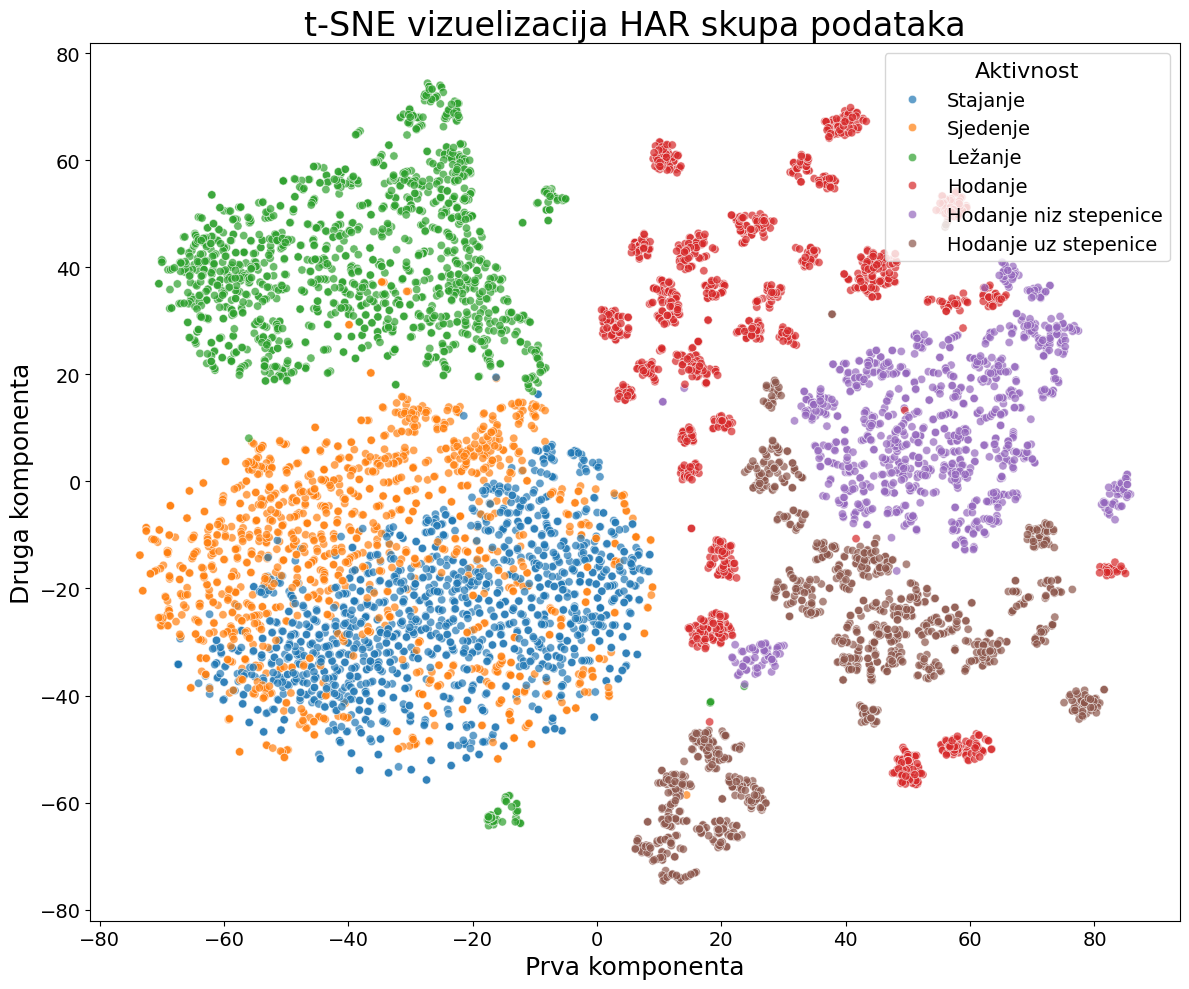

In [1]:
# Instalacija potrebnih paketa
!pip install -q scikit-learn matplotlib seaborn

# Importovanje potrebnih biblioteka
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Preuzimanje HAR dataset-a
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip
!unzip -q -o "UCI HAR Dataset.zip"

# Učitavanje podataka
X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
y_train = pd.read_csv('UCI HAR Dataset/train/y_train.txt', delim_whitespace=True, header=None)

# Mapiranje oznaka na imena aktivnosti
activity_labels = {
    1: 'Hodanje',
    2: 'Hodanje uz stepenice',
    3: 'Hodanje niz stepenice',
    4: 'Sjedenje',
    5: 'Stajanje',
    6: 'Ležanje'
}

# Standardizacija podataka
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Primjena t-SNE algoritma
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_embedded = tsne.fit_transform(X_scaled)

# Pretvaranje u DataFrame kako bi vizuelizacija bila lakša
df_embedded = pd.DataFrame()
df_embedded['Dim1'] = X_embedded[:, 0]
df_embedded['Dim2'] = X_embedded[:, 1]
df_embedded['Label'] = y_train[0].map(activity_labels)

# Crtanje grafika
plt.figure(figsize=(12, 10))
scatter = sns.scatterplot(
    x='Dim1', y='Dim2',
    hue='Label',
    palette='tab10',
    data=df_embedded,
    legend='full',
    alpha=0.7
)
plt.title('t-SNE vizuelizacija HAR skupa podataka', fontsize=24)
plt.xlabel('Prva komponenta', fontsize=18)
plt.ylabel('Druga komponenta', fontsize=18)

# Legenda
plt.legend(
    title='Aktivnost',
    loc='upper right',
    frameon=True,
    title_fontsize=16,
    fontsize=14
)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()